In [134]:
import pandas as pd
housing_train = pd.read_csv('https://filtereddatasets.s3.amazonaws.com/pg/housing-pipelined/train.csv')
housing_test = pd.read_csv('https://filtereddatasets.s3.amazonaws.com/pg/housing-pipelined/test.csv')
# housing_train = pd.get_dummies(housing_train,dtype=int)
# housing_test = pd.get_dummies(housing_train,dtype=int)
housing_train.head(1)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -118.38     33.83                40.0       3070.0           570.0   

   population  households  median_income  median_house_value ocean_proximity  \
0      1264.0       506.0         5.1626            432700.0       <1H OCEAN   

   population_per_household  bedrooms_ratio  house_value_high  
0                  2.498024        0.185668                 1

In [2]:
housing_train.select_dtypes(include=['int64', 'float64']).columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'population_per_household', 'bedrooms_ratio',
       'house_value_high'],
      dtype='object')

# Correlation Matrix

In [3]:
# Select numeric features
# features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
#        'total_bedrooms', 'population', 'households', 'median_income','population_per_household', 'bedrooms_ratio']
features = ['housing_median_age','population','total_rooms','longitude','latitude']
numeric_features = housing_train[features]

# Compute the correlation matrix
correlation_matrix = numeric_features.corr()

# Display the correlation matrix
correlation_matrix

housing_median_age  population  total_rooms  longitude  \
housing_median_age            1.000000   -0.297703    -0.361733  -0.112941   
population                   -0.297703    1.000000     0.858371   0.105756   
total_rooms                  -0.361733    0.858371     1.000000   0.049370   
longitude                    -0.112941    0.105756     0.049370   1.000000   
latitude                      0.015278   -0.113576    -0.040632  -0.924947   

                    latitude  
housing_median_age  0.015278  
population         -0.113576  
total_rooms        -0.040632  
longitude          -0.924947  
latitude            1.000000

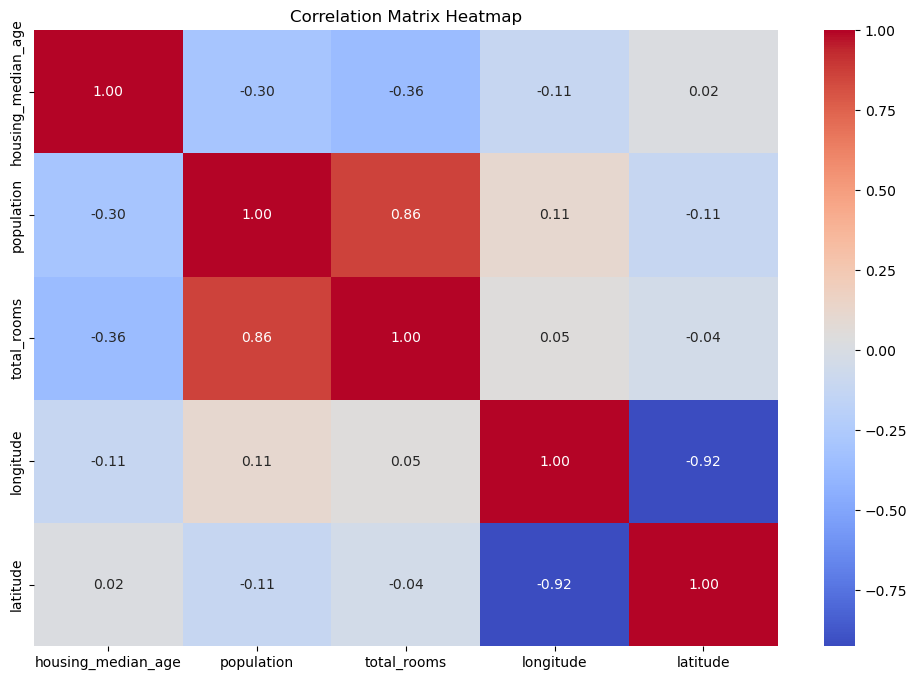

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
housing_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'population_per_household',
       'bedrooms_ratio', 'house_value_high'],
      dtype='object')

# Features Pipeline

In [135]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


features = ['housing_median_age','population','total_rooms','ocean_proximity','longitude','latitude']
# features = ['bedrooms_ratio','median_income','population_per_household','ocean_proximity_<1H OCEAN',
#        'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
#        'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

X_train = housing_train[features]
y_train = housing_train['median_house_value']
X_test = housing_test[features]
y_test = housing_test['median_house_value']

cat_attribs = X_train.select_dtypes(include=['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, list(X_train.select_dtypes(include=['int64', 'float64']).columns)),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# housing_train_num_tr = num_pipeline.fit_transform(housing_train)
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)
# X_train_prepared = pd.DataFrame(X_train_prepared)
X_train_prepared

array([[ 0.89686078, -0.1425603 ,  0.19867181, ...,  0.        ,
         0.        ,  0.        ],
       [-0.29262977, -0.73241985, -0.23622614, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.21405826, -1.10937151, -1.06711012, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.13475889,  0.20908674, -0.18586953, ...,  0.        ,
         0.        ,  0.        ],
       [-0.45122851,  0.11048596,  0.08880286, ...,  0.        ,
         0.        ,  0.        ],
       [-2.03721592,  7.15127988,  8.43426563, ...,  0.        ,
         0.        ,  0.        ]])

# Multiple Model Evaluation

## Without GridSearchCV

Evaluating Model: Linear Regression...
Evaluating Model: Ridge...
Evaluating Model: Lasso...
Evaluating Model: Decision Tree...
Evaluating Model: SVM...
Evaluating Model: Random Forest...


/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_75990/3377816392.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='CV Scores', data=df_cv_results, palette=palette, order=order)
/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_75990/3377816392.py:63: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(x='Model', y='CV Scores', data=df_cv_results, palette=palette, order=order)


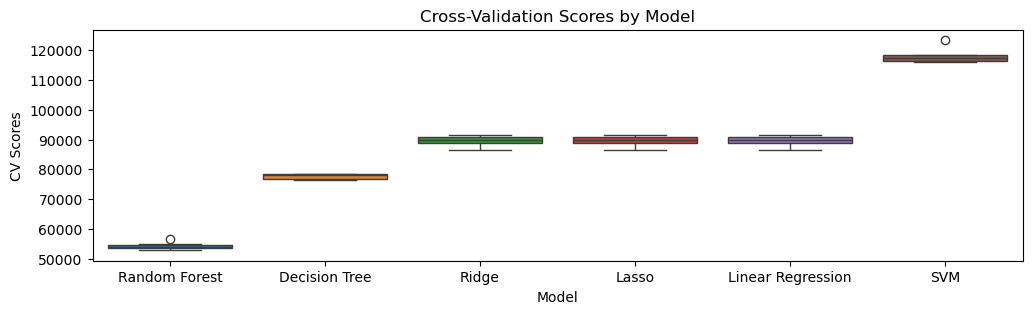

Model: Linear Regression, CV Scores: [89965.44720754 88291.74196036 91445.5739781  90059.05617203
 86618.74490852 91114.19246323]
Model: Ridge, CV Scores: [89974.43747595 88291.38672881 91410.30798953 90062.10369182
 86619.54959594 91113.71438798]
Model: Lasso, CV Scores: [89965.62169986 88291.7416143  91445.06898807 90059.11079365
 86618.75238598 91114.21158264]
Model: Decision Tree, CV Scores: [78420.78450089 78455.21422698 76471.7555397  76435.2910096
 78320.05705697 78007.38685098]
Model: SVM, CV Scores: [118222.19031128 118252.26647351 123370.16049398 116848.26086771
 115895.0492387  116140.27108952]
Model: Random Forest, CV Scores: [56548.3029387  53521.39996521 54857.71564839 53551.44569689
 54167.23416563 52850.97917288]
Model: Linear Regression, Best Params: Default parameters, MSE: -8027790504.363652, RMSE: 89582.45944829633,'Model Score: '0.3973552048888036
Model: Ridge, Best Params: Default parameters, MSE: -8027075103.253848, RMSE: 89578.58331167015,'Model Score: '0.397349

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold, GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(alpha=0.1, max_iter=100000),
    "Decision Tree": DecisionTreeRegressor(),
    "SVM": SVR(),
    "Random Forest": RandomForestRegressor()
}



# List to store results
results = []
cv_results = []
# Loop through models and their parameters
for model_name, model in models.items():
    print(f"Evaluating Model: {model_name}...")
    
    # Define cross-validation strategy
    kf = KFold(n_splits=6, random_state=42, shuffle=True)

    best_model = model.fit(X_train_prepared, y_train)
    best_params = "Default parameters"
    
    # Evaluate the best model
    scores = []
    cv_scores = cross_val_score(model, X_train_prepared, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    cv_results.append({"Model" : model_name, "CV Scores" : cv_rmse_scores})
    model_score = best_model.score(X_train_prepared, y_train)
    model_mse_score = np.mean(cv_scores)
    model_rmse_score = np.mean(cv_rmse_scores)
    results.append({"Model": model_name, "Best Params": best_params, "MSE": model_mse_score, "RMSE": model_rmse_score,'Model Score: ':model_score})

# Print results
# Create cv results flattened dataset for boxplot
flat_data = []
for cv_result in cv_results:
    model = cv_result['Model']
    scores = cv_result['CV Scores']
    for score in scores:
        flat_data.append({'Model': model, 'CV Scores': score})
# Create a DataFrame
df_cv_results = pd.DataFrame(flat_data)

# Plot cv scores in boxplot
palette = sns.color_palette()
order = df_cv_results.groupby('Model')['CV Scores'].mean().sort_values().index

plt.figure(figsize=(12, 3))
sns.boxplot(x='Model', y='CV Scores', data=df_cv_results, palette=palette, order=order)
plt.title('Cross-Validation Scores by Model')
plt.show()


for cv_result in cv_results:
    print(f"Model: {cv_result['Model']}, CV Scores: {cv_result['CV Scores']}")
for result in results:
    print(f"Model: {result['Model']}, Best Params: {result['Best Params']}, MSE: {result['MSE']}, RMSE: {result['RMSE']},'Model Score: '{result['Model Score: ']}")


In [126]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## With GridSearchCV

Fine-tuning Linear Regression...
Fine-tuning Ridge...
Fitting 6 folds for each of 5 candidates, totalling 30 fits
Fine-tuning Lasso...
Fitting 6 folds for each of 5 candidates, totalling 30 fits


/opt/anaconda3/envs/oracle-ai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.783e+12, tolerance: 1.789e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/oracle-ai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.896e+12, tolerance: 1.829e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/oracle-ai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

Fine-tuning Decision Tree...
Fitting 6 folds for each of 4 candidates, totalling 24 fits
Fine-tuning SVM...
Fitting 6 folds for each of 8 candidates, totalling 48 fits


/opt/anaconda3/envs/oracle-ai/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fine-tuning Random Forest...
Fitting 6 folds for each of 9 candidates, totalling 54 fits


/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_75990/2011362715.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='CV Scores', data=df_cv_results, palette=palette, order=order)
/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_75990/2011362715.py:80: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(x='Model', y='CV Scores', data=df_cv_results, palette=palette, order=order)


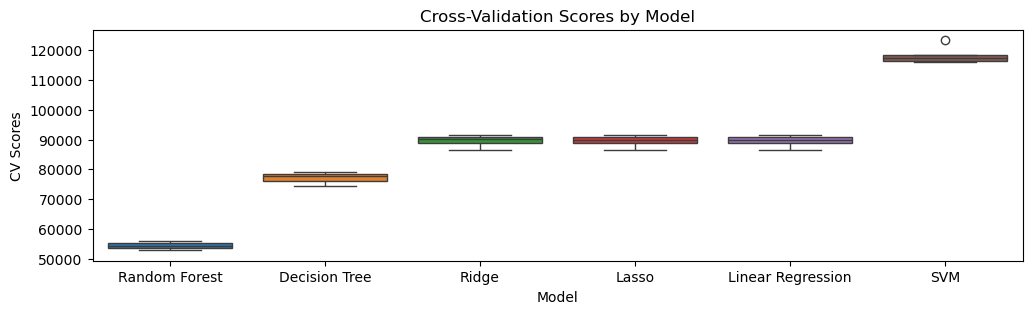

Model: Linear Regression, CV Scores: [89965.44720754 88291.74196036 91445.5739781  90059.05617203
 86618.74490852 91114.19246323]
Model: Ridge, CV Scores: [89974.43747595 88291.38672881 91410.30798953 90062.10369182
 86619.54959594 91113.71438798]
Model: Lasso, CV Scores: [89966.76531511 88292.00637815 91440.72961428 90059.39661839
 86618.89739775 91114.63390279]
Model: Decision Tree, CV Scores: [78961.33900122 77582.76167768 75494.18495536 74377.10019855
 78019.36788655 78392.75157777]
Model: SVM, CV Scores: [118222.19031128 118252.26647351 123370.16049398 116848.26086771
 115895.0492387  116140.27108952]
Model: Random Forest, CV Scores: [55956.07081362 53876.30009728 55639.59049912 53603.54012961
 54297.72031867 52813.6672796 ]
Model: Linear Regression, Best Params: Default parameters, MSE: -8027790504.363652, RMSE: 89582.45944829633,'Model Score: '0.3973552048888036
Model: Ridge, Best Params: {'alpha': 1}, MSE: -8027075103.253848, RMSE: 89578.58331167015,'Model Score: '0.39734955459

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVM": SVR(),
    "Random Forest": RandomForestRegressor()
}

# Define hyperparameter grids for each model
param_grids = {
    "Linear Regression": {},  # No hyperparameters for linear regression
    "Ridge": {"alpha": [0.01, 0.1, 1, 10, 100]},  # Alpha values for Ridge
    "Lasso": {"alpha": [0.01, 0.1, 1, 10, 100], "max_iter" : [100_000]},  # Alpha values for Lasso
    "Decision Tree": {"max_depth": [3, 5, 10, None]},  # Max depth values for Decision Tree
    "SVM": {"C": [0.1, 1, 10, 100], "kernel": ["linear", "rbf"]},  # C, kernel, and epsilon values for SVM
    "Random Forest": {"n_estimators": [10, 50, 100], "max_features": [None, "sqrt", "log2"]}  # Hyperparameters for Random Forest
}



# List to store results
results = []
cv_results = []
# Loop through models and their parameters
for model_name, model in models.items():
    print(f"Fine-tuning {model_name}...")
    
    # Get the hyperparameter grid for the model
    param_grid = param_grids[model_name]
    
    # Define cross-validation strategy
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    
    # If there are hyperparameters to tune
    if param_grid:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
        grid_search.fit(X_train_prepared, y_train)  # Use your training data here
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        # No hyperparameters to tune; fit directly
        best_model = model.fit(X_train_prepared, y_train)
        best_params = "Default parameters"
    
    # Evaluate the best model
    scores = []
    cv_scores = cross_val_score(model, X_train_prepared, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    cv_results.append({"Model" : model_name, "CV Scores" : cv_rmse_scores})
    model_score = best_model.score(X_train_prepared, y_train)
    model_mse_score = np.mean(cv_scores)
    model_rmse_score = np.mean(cv_rmse_scores)
    results.append({"Model": model_name, "Best Params": best_params, "MSE": model_mse_score, "RMSE": model_rmse_score,'Model Score: ':model_score})

# Print results
flat_data = []
for cv_result in cv_results:
    model = cv_result['Model']
    scores = cv_result['CV Scores']
    for score in scores:
        flat_data.append({'Model': model, 'CV Scores': score})
# Create a DataFrame
df_cv_results = pd.DataFrame(flat_data)

# Plot cv scores in boxplot
palette = sns.color_palette()
order = df_cv_results.groupby('Model')['CV Scores'].mean().sort_values().index

plt.figure(figsize=(12, 3))
sns.boxplot(x='Model', y='CV Scores', data=df_cv_results, palette=palette, order=order)
plt.title('Cross-Validation Scores by Model')
plt.show()


for cv_result in cv_results:
    print(f"Model: {cv_result['Model']}, CV Scores: {cv_result['CV Scores']}")
for result in results:
    print(f"Model: {result['Model']}, Best Params: {result['Best Params']}, MSE: {result['MSE']}, RMSE: {result['RMSE']},'Model Score: '{result['Model Score: ']}")


In [144]:
df_cv_results.groupby('Model')['CV Scores'].mean().sort_values()

Model
Random Forest         54364.481523
Decision Tree         77137.917550
Ridge                 89578.583312
Lasso                 89582.071538
Linear Regression     89582.459448
SVM                  118121.366412
Name: CV Scores, dtype: float64

In [138]:
best_model

RandomForestRegressor(max_features=None)

In [143]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

57250.5596369833 {'max_features': None, 'n_estimators': 10}
54699.66586076873 {'max_features': None, 'n_estimators': 50}
54460.60116999577 {'max_features': None, 'n_estimators': 100}
59334.892707145635 {'max_features': 'sqrt', 'n_estimators': 10}
56018.23298910997 {'max_features': 'sqrt', 'n_estimators': 50}
55544.05878109429 {'max_features': 'sqrt', 'n_estimators': 100}
59055.17665199009 {'max_features': 'log2', 'n_estimators': 10}
55949.92494224494 {'max_features': 'log2', 'n_estimators': 50}
55448.81308920206 {'max_features': 'log2', 'n_estimators': 100}


# With RandomizedSearchCV

Train set score:  0.9349813061595152
Test set score:  0.7632837139038965


Fine-tuning Linear Regression...
Fine-tuning Ridge...
Fitting 6 folds for each of 5 candidates, totalling 30 fits


/opt/anaconda3/envs/oracle-ai/lib/python3.13/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=6. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fine-tuning Lasso...
Fitting 6 folds for each of 5 candidates, totalling 30 fits


/opt/anaconda3/envs/oracle-ai/lib/python3.13/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=6. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/envs/oracle-ai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.896e+12, tolerance: 1.829e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/oracle-ai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.902e+12, tolerance: 1.823e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anacond

Fine-tuning Decision Tree...
Fitting 6 folds for each of 4 candidates, totalling 24 fits
Fine-tuning SVM...
Fitting 6 folds for each of 6 candidates, totalling 36 fits
Fine-tuning Random Forest...
Fitting 6 folds for each of 6 candidates, totalling 36 fits


/opt/anaconda3/envs/oracle-ai/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_75990/3987488578.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='CV Scores', data=df_cv_results, palette=palette, order=order)
/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_75990/3987488578.py:82: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(x='Model', y='CV Scores', data=df_cv_results, palette=palette, order=order)


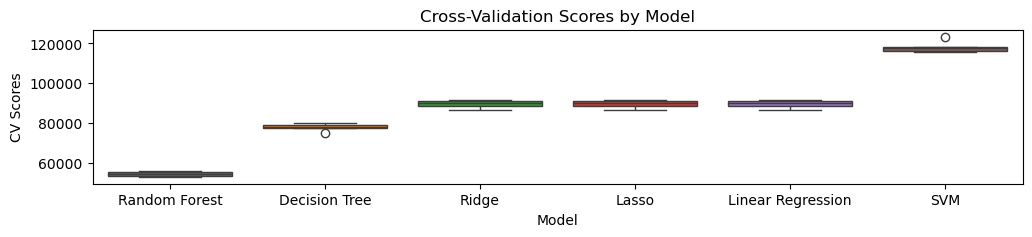

Model: Linear Regression, CV Scores: [89965.44720754 88291.74196036 91445.5739781  90059.05617203
 86618.74490852 91114.19246323]
Model: Ridge, CV Scores: [89974.43747595 88291.38672881 91410.30798953 90062.10369182
 86619.54959594 91113.71438798]
Model: Lasso, CV Scores: [89966.76531511 88292.00637815 91440.72961428 90059.39661839
 86618.89739775 91114.63390279]
Model: Decision Tree, CV Scores: [77555.45548223 79211.44437663 75170.1979317  77634.00478287
 78413.66346974 80146.0828808 ]
Model: SVM, CV Scores: [118222.19031128 118252.26647351 123370.16049398 116848.26086771
 115895.0492387  116140.27108952]
Model: Random Forest, CV Scores: [55892.8646549  53567.30092477 55385.19235863 53826.98716022
 54685.13685723 53027.02685284]
Model: Linear Regression, Best Params: Default parameters, MSE: -8027790504.363652, RMSE: 89582.45944829633,'Model Score: '0.3973552048888036
Model: Ridge, Best Params: {'alpha': 1}, MSE: -8027075103.253848, RMSE: 89578.58331167015,'Model Score: '0.39734955459

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVM": SVR(),
    "Random Forest": RandomForestRegressor()
}

# Define hyperparameter grids for each model
param_grids = {
    "Linear Regression": {},  # No hyperparameters for linear regression
    "Ridge": {"alpha": [0.01, 0.1, 1, 10, 100]},  # Alpha values for Ridge
    "Lasso": {"alpha": [0.01, 0.1, 1, 10, 100], "max_iter" : [100_000]},  # Alpha values for Lasso
    "Decision Tree": {"max_depth": [3, 5, 10, None]},  # Max depth values for Decision Tree
    "SVM": {"C": [0.1, 1, 10, 100], "kernel": ["linear", "rbf"], "epsilon": [0.1, 0.2, 0.5, 1]},  # C, kernel, and epsilon values for SVM
    "Random Forest": {"n_estimators": [10, 50, 100], "max_features": [None, "sqrt", "log2"],'max_depth': [None, 10, 20, 100]}  # Hyperparameters for Random Forest
}

# List to store results
results = []
cv_results = []
# Loop through models and their parameters
for model_name, model in models.items():
    print(f"Fine-tuning {model_name}...")
    
    # Get the hyperparameter grid for the model
    param_grid = param_grids[model_name]
    
    # Define cross-validation strategy
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    
    # If there are hyperparameters to tune
    if param_grid:
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, n_iter=6, random_state=42)
        random_search.fit(X_train_prepared, y_train)  # Use your training data here
        best_model = random_search.best_estimator_
        best_params = random_search.best_params_
    else:
        # No hyperparameters to tune; fit directly
        best_model = model.fit(X_train_prepared, y_train)
        best_params = "Default parameters"
    
    # Evaluate the best model
    scores = []
    cv_scores = cross_val_score(model, X_train_prepared, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    cv_results.append({"Model" : model_name, "CV Scores" : cv_rmse_scores})
    model_score = best_model.score(X_train_prepared, y_train)
    model_mse_score = np.mean(cv_scores)
    model_rmse_score = np.mean(cv_rmse_scores)
    results.append({"Model": model_name, "Best Params": best_params, "MSE": model_mse_score, "RMSE": model_rmse_score,'Model Score: ':model_score})

# Print results
# Create cv results flattened dataset for boxplot
flat_data = []
for cv_result in cv_results:
    model = cv_result['Model']
    scores = cv_result['CV Scores']
    for score in scores:
        flat_data.append({'Model': model, 'CV Scores': score})
# Create a DataFrame
df_cv_results = pd.DataFrame(flat_data)

# Plot cv scores in boxplot
palette = sns.color_palette()
order = df_cv_results.groupby('Model')['CV Scores'].mean().sort_values().index

plt.figure(figsize=(12, 2))
sns.boxplot(x='Model', y='CV Scores', data=df_cv_results, palette=palette, order=order)
plt.title('Cross-Validation Scores by Model')
plt.show()


for cv_result in cv_results:
    print(f"Model: {cv_result['Model']}, CV Scores: {cv_result['CV Scores']}")
for result in results:
    print(f"Model: {result['Model']}, Best Params: {result['Best Params']}, MSE: {result['MSE']}, RMSE: {result['RMSE']},'Model Score: '{result['Model Score: ']}")

print('Best model Train set score: ', best_model.score(X_train_prepared, y_train))
print('Best model Test set score: ', best_model.score(X_test_prepared, y_test))


In [152]:
df_cv_results.groupby('Model')['CV Scores'].mean().sort_values()

Model
Random Forest         54397.418135
Decision Tree         78021.808154
Ridge                 89578.583312
Lasso                 89582.071538
Linear Regression     89582.459448
SVM                  118121.366412
Name: CV Scores, dtype: float64

In [118]:
best_model

RandomForestRegressor(max_depth=100, max_features='log2')

# Linear Regression Example

In [153]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_prepared, y_train)
lr.score(X_test_prepared, y_test)

0.39139063515052264

In [162]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, lr.predict(X_test_prepared))
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
print(lin_mse)

90872.04383328675
8257728350.438788


In [161]:
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=6, random_state=42, shuffle=True)

lr_train_scores = cross_val_score(lr, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=kf)
lr_test_scores = cross_val_score(lr, X_test_prepared, y_test, scoring="neg_mean_squared_error", cv=kf)
lr_train_rmse_scores = np.sqrt(-lr_train_scores)
lr_test_rmse_scores = np.sqrt(-lr_test_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std(), "\n")

print('Train RMSE Score: ', lr_train_rmse_scores.mean())
print('Test RMSE Score: ' , lr_test_rmse_scores.mean())


Train RMSE Score:  89582.45944829633
Test RMSE Score:  90868.54519298337


In [163]:
lr.score(X_test_prepared, y_test)

0.39139063515052264

# Lasso Example

In [64]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, max_iter=100000)
lasso.fit(X_train_prepared, y_train)
lasso.score(X_test_prepared, y_test)

0.3913905169845088

In [77]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lasso, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lasso_rmse_scores)

Scores: [87907.10436732 87269.811133   92299.67576155 88687.46050389
 88595.44830059 87751.11081031 94953.15572597 88809.69901625
 90363.35124744 89096.65907567]
Mean: 89573.34759419791
Standard deviation: 2257.2987010634643


In [66]:
display_scores(lasso_rmse_scores)

Scores: [87907.10436732 87269.811133   92299.67576155 88687.46050389
 88595.44830059 87751.11081031 94953.15572597 88809.69901625
 90363.35124744 89096.65907567]
Mean: 89573.34759419791
Standard deviation: 2257.2987010634643


In [15]:
housing_test['prediction_linear_reg'] = lr.predict(X_test_prepared)
housing_test['prediction_best_model'] = best_model.predict(X_test_prepared)
# housing_test[['median_house_value', 'prediction_linear_reg','prediction_best_model']].to_excel('housing_predictions.xlsx', index=False)  
housing_test[['median_house_value', 'prediction_linear_reg','prediction_best_model']]
housing_test[['median_house_value', 'prediction_linear_reg', 'prediction_best_model']].applymap('${:,.2f}'.format) 

/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_4040/2840408162.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  housing_test[['median_house_value', 'prediction_linear_reg', 'prediction_best_model']].applymap('${:,.2f}'.format)


median_house_value prediction_linear_reg prediction_best_model
0           $248,000.00           $259,435.67           $170,379.00
1           $127,100.00           $239,766.27           $156,222.00
2           $362,900.00           $281,800.11           $310,688.01
3           $146,800.00           $203,957.30           $153,027.00
4           $113,700.00           $112,225.41           $112,861.00
...                 ...                   ...                   ...
4141         $73,800.00           $142,195.30            $86,548.00
4142        $296,200.00           $256,405.45           $229,141.00
4143        $500,001.00           $290,056.19           $485,751.64
4144        $166,400.00           $238,520.68           $206,542.00
4145        $160,300.00           $203,952.68           $175,797.00

[4146 rows x 3 columns]

# Random Forest Example

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_simple = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=100, random_state=42)
rf_simple.fit(X_train_prepared, y_train)
rf_simple.score(X_test_prepared, y_test)

0.7720760576491275

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

param_distributions = {
  # "n_estimators": [10, 50, 100], "max_features": ["auto", "sqrt", "log2"]
  "n_estimators": [10, 50, 100], 
  "max_features": [None, "sqrt", "log2"],
  'max_depth': [None, 10, 20, 100],      
  # 'min_samples_split': [2, 5, 10],       
  # 'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, n_iter=5, random_state=42)
random_search.fit(X_train_prepared, y_train)
# final_score = random_search.score(X_test_prepared, y_test)
best_rf_model = random_search.best_estimator_
best_rf_params = random_search.best_params_
y_train_pred = best_rf_model.predict(X_train_prepared)
actual_score = best_rf_model.score(X_train_prepared, y_train)
scores = []
val_scores = []
for train_idx, val_idx in kf.split(X_train_prepared):
        X_train_prepared_fold, X_val_fold = X_train_prepared[train_idx], X_train_prepared[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
        # Para cuando use pandas
        # X_train_prepared_fold, X_val_fold = X_train_prepared.iloc[train_idx], X_train_prepared.iloc[val_idx]
        # y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        random_search.fit(X_train_prepared_fold, y_train_fold)
        y_pred = best_rf_model.predict(X_val_fold)
        val_scores.append(best_model.score(X_val_fold, y_val_fold))
        scores.append(mean_squared_error(y_val_fold, y_pred))

y_test_pred = best_rf_model.predict(X_test_prepared)
test_score = best_rf_model.score(X_test_prepared, y_test)
# Annotate and print the scores
print("Best Random Forest Model Parameters:", best_rf_params)
print("Best Random Forest Model Score:", random_search.best_score_)
print("RF  Train Score:", actual_score)
print('Validation Scores: ', val_scores)
print('RF Test Scores: ', test_score)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best Random Forest Model Parameters: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 20}
Best Random Forest Model Score: -3330857877.6161118
RF  Train Score: 0.9627235903533569
Validation Scores:  [0.9652287169052701, 0.9673857437393698, 0.9689210957833662, 0.966158330890543, 0.9664004124502352, 0.7702852086065742]
RF Test Scores:  0.7724570273851911


In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf_model, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_rmse_scores)

Scores: [54795.58056635 56843.72988819 58175.10300945 55859.52511758
 54004.95283393 55593.81383749 54114.37095448 54184.97422064
 55593.53044547 56575.35216411]
Mean: 55574.093303768976
Standard deviation: 1288.0493365472464


In [50]:
y_test_pred = best_rf_model.predict(X_test_prepared)
best_rf_model.score(X_test_prepared, y_test_pred)

1.0

In [42]:
scores

[np.float64(432401195.4194684),
 np.float64(408591029.9883982),
 np.float64(433925177.71244586),
 np.float64(428929411.7422565),
 np.float64(410352428.68625134),
 np.float64(387742118.0644755)]

In [40]:
best_rf_model.score(X_test_prepared, y_test)

0.7726574243993498

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint
import numpy as np


# Define the model
model = RandomForestRegressor()

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,                        # Test 50 parameter combinations
    scoring='neg_mean_squared_error', # Optimize for MSE
    cv=5,                             # 5-fold cross-validation
    random_state=42,                  # Reproducibility
    n_jobs=-1,                        # Use all available cores
    verbose=1
)

# Fit the model
random_search.fit(X_train_prepared, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best estimator
best_model = random_search.best_estimator_

# Evaluate on test data
train_score = best_model.score(X_train_prepared, y_train)  # R² on training data
test_score = best_model.score(X_test_prepared, y_test)     # R² on testing data

# Calculate Mean Squared Error (MSE) for reference
y_pred = best_model.predict(X_test_prepared)
test_mse = mean_squared_error(y_test, y_pred)

# Print scores
print("Training R² Score:", train_score)
print("Testing R² Score:", test_score)
print("Test MSE:", test_mse)


In [37]:
best_model.score(X_test_prepared, y_test)

0.7765061491172401

In [12]:
housing_test['rf pred'] = grid_search.predict(X_test_prepared)
housing_test[['median_house_value', 'rf pred']]
housing_test[['median_house_value', 'rf pred']].applymap('${:,.2f}'.format)

/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_75990/3231506697.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  housing_test[['median_house_value', 'rf pred']].applymap('${:,.2f}'.format)


median_house_value      rf pred
0           $248,000.00  $189,717.00
1           $127,100.00  $151,006.01
2           $362,900.00  $307,471.00
3           $146,800.00  $157,689.00
4           $113,700.00  $109,019.00
...                 ...          ...
4141         $73,800.00   $85,398.00
4142        $296,200.00  $238,831.00
4143        $500,001.00  $440,347.57
4144        $166,400.00  $214,653.45
4145        $160,300.00  $181,371.00

[4146 rows x 2 columns]

In [52]:
housing_test[['median_house_value', 'prediction_linear_reg','prediction_best_model']]
housing_test[['median_house_value', 'prediction_linear_reg', 'prediction_best_model']].applymap('${:,.2f}'.format)

/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_89712/3317012818.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  housing_test[['median_house_value', 'prediction_linear_reg', 'prediction_best_model']].applymap('${:,.2f}'.format)


median_house_value prediction_linear_reg prediction_best_model
0           $248,000.00           $259,435.67           $185,374.01
1           $127,100.00           $239,766.27           $158,174.00
2           $362,900.00           $281,800.11           $313,730.08
3           $146,800.00           $203,957.30           $169,763.03
4           $113,700.00           $112,225.41           $114,007.00
...                 ...                   ...                   ...
4141         $73,800.00           $142,195.30            $89,017.00
4142        $296,200.00           $256,405.45           $215,125.00
4143        $500,001.00           $290,056.19           $464,167.67
4144        $166,400.00           $238,520.68           $212,850.02
4145        $160,300.00           $203,952.68           $178,167.00

[4146 rows x 3 columns]

In [53]:
grid_search.best_estimator_

RandomForestRegressor(max_features='sqrt')

In [54]:
best_model.predict(X_test_prepared).shape

(4146,)

In [45]:
housing_test.shape

(16494, 17)

In [46]:
housing_test['prediction'] = best_model.predict(X_test_prepared)
housing_test[['median_house_value', 'prediction']]

median_house_value     prediction
0                432700.0  273234.907950
1                169400.0  191600.925493
2                275000.0  311806.182978
3                500001.0  286471.379757
4                107300.0  158029.791429
...                   ...            ...
16489            195100.0  269345.938820
16490            209200.0  117973.941873
16491            217800.0  191890.705555
16492            113700.0  121477.863479
16493            143000.0  157268.611753

[16494 rows x 2 columns]